In [12]:
import torch  
from diffusers import StableDiffusionImg2ImgPipeline  
from PIL import Image  
import numpy as np
device = "cuda:4"
# 加载图生图pipeline  
model_id = "checkpoints/stablev15"  
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)  
  
# 读取初始图片  
init_image = np.array(Image.open("data/mmcelebahq/mask/27000.png"))
images = [init_image for _ in range(3)]
images = np.stack(images)
images = np.transpose(images,(1,2,0))
print(np.unique(images))
print(images.shape)
image = Image.fromarray(images)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

[ 0  1  2  4  5  6  7  9 11 12 13 17]
(512, 512, 3)


  0%|          | 0/40 [00:00<?, ?it/s]

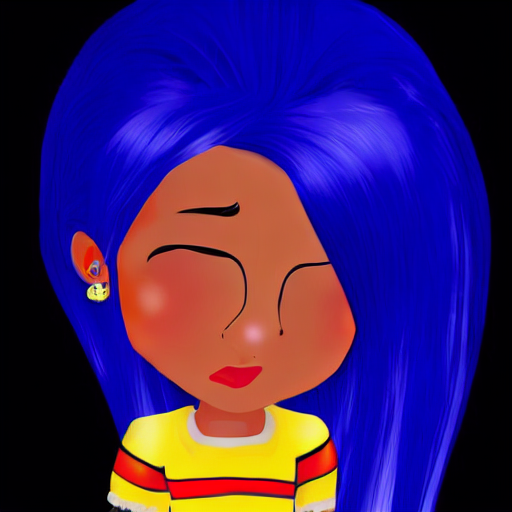

In [15]:
pipe.safety_checker = None
# 推理  
prompt = "She is young and has straight hair."  
generator = torch.Generator(device=device).manual_seed(42)  
  
image = pipe.__call__(  
    prompt=prompt,  
    image=Image.open("data/mmcelebahq/mask/27000.png").convert("RGB"),  
    # strength=0.5,  
    guidance_scale=7.5,  
    generator=generator  
).images[0]  
image  